
# Linear Regression Project

Analyzing customer's data to decide if company should focus on their App or Website , also to see how much a person spent time and money.

## Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Data

Data includes customer's info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 
* Yearly Amount Spent : How much amount a customer spent.


In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()  # this shows that data is complete as there is no null value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()   # more info about the columns.

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

Exploring data now : 

First we will check if there is any relation between Time on Website and Yearly Amount Spent. 

In [6]:
# setting the style for sns graphs.
sns.set_style('whitegrid')

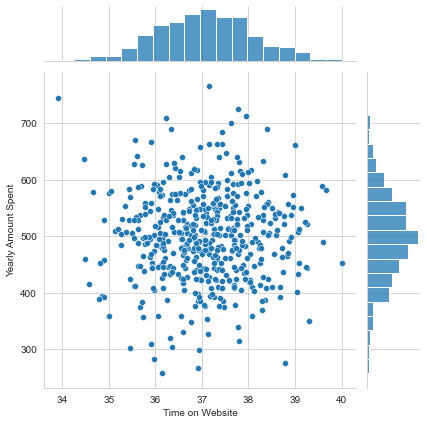

In [7]:
#using jointplot to see the relation between them.
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

In [8]:
# above plot shows that more time spent on Website was in between 36-38 min and customers spent 400-600 dollar amount yearly.

Now we will check if there is any relation between Time on App and Yearly Amount Spent. 

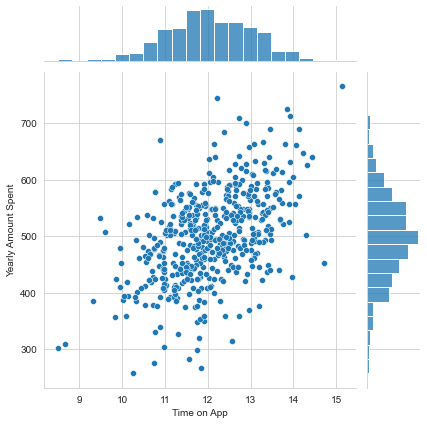

In [9]:
# using jointplot again.
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

In [10]:
# above plot shows that maximum time spent on was 11-13 mins and amount spent was in between 400-600 dollars.

Now Checking relation between Time on App and Length of Membership

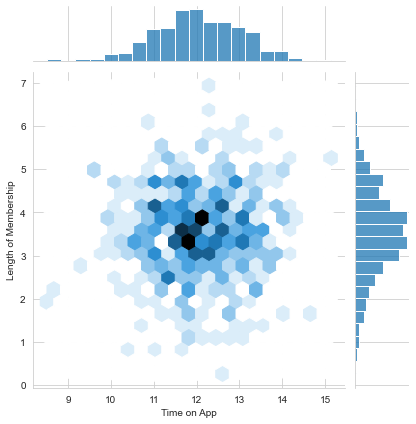

In [13]:
# using jointplot but this time a different plot hex.
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind='hex')

**Exploring relationship between customer data by using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) **

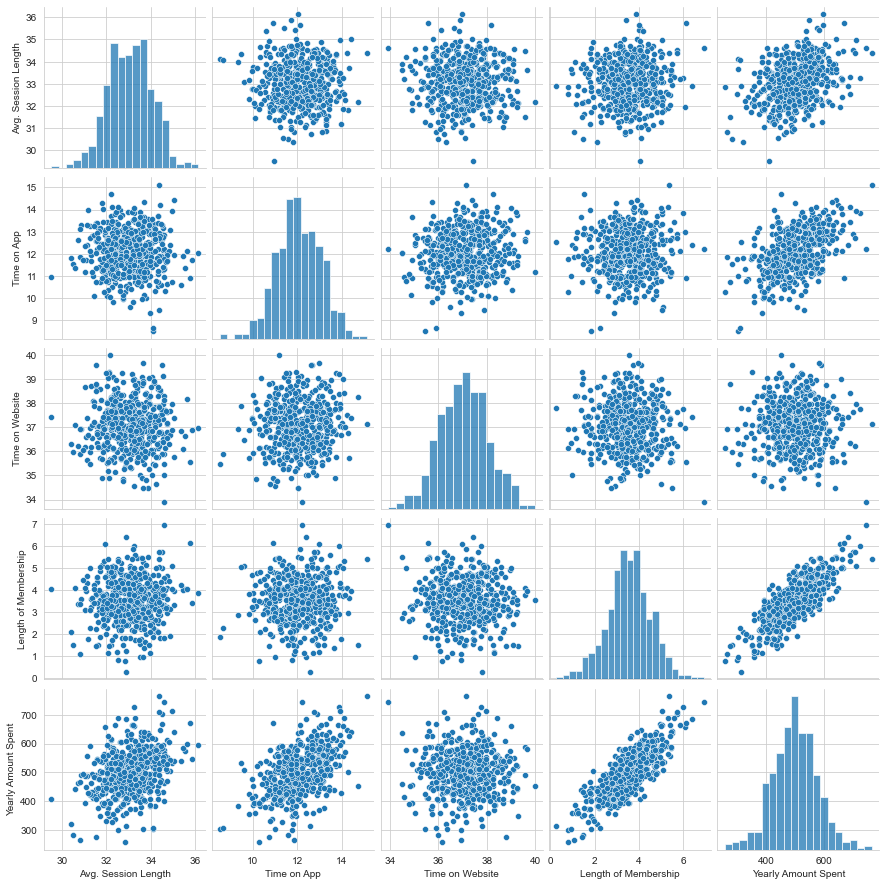

In [13]:
sns.pairplot(customers)

In [14]:
# It is clear from above plots that Yearly Amount Spent is most correlated with Length of Membership

**Creating a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

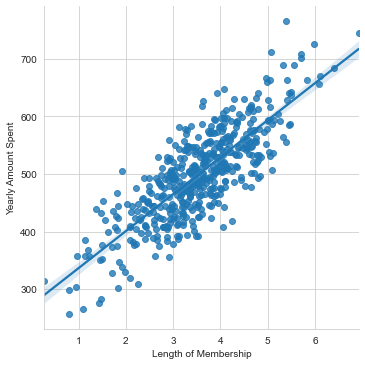

In [15]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

## Training and Testing Data

Now splitting the data in training and testing data to fit the model. Yearly Amount Spent to be predicted by the help of the rest Numerical data.

In [16]:
x = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [17]:
y = customers['Yearly Amount Spent']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

## Training the Model


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(x_train, y_train)

LinearRegression()

In [23]:
print('Coefficients : ', lm.coef_)

Coefficients :  [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data


In [24]:
predictions = lm.predict(x_test)

**Creating a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predictions')

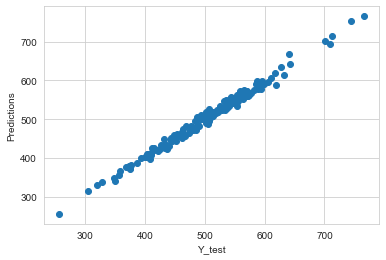

In [25]:
plt.scatter(y_test, predictions)
plt.xlabel('Y_test')
plt.ylabel('Predictions')

In [26]:
# the model is scattered properly therefore model is a good fit.

## Evaluating the Model



In [27]:
from sklearn import metrics

print('MAE : ', metrics.mean_absolute_error(y_test, predictions))
print('MSE : ', metrics.mean_squared_error(y_test, predictions))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE :  7.228148653430832
MSE :  79.81305165097444
RMSE :  8.933815066978633


## Residuals


C:\Users\MUSKAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


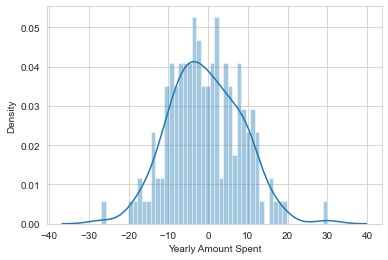

In [29]:
sns.distplot((y_test-predictions),bins=50);

## Conclusion
Now we have to notice if we should spent our time more on App or on Website. Or maybe that doesn't even really matter, and Membership Time is what is really important. 

In [30]:
df = pd.DataFrame(lm.coef_,x.columns)
df.columns = ['Coefficients']
df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

This is tricky, there are two ways to think about this: We can develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better.
There is not much difference in the need of App and Website.